# Loan Application Status Prediction


# Problem Statement:
    
    
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

### Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

### Dependent Variable (Target Variable):

- Loan_Status

# Importing all the required libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.shape

(614, 13)

In [6]:
print(df.isna().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


<AxesSubplot:>

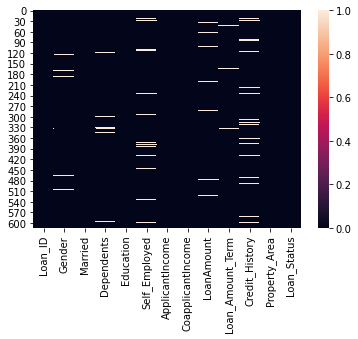

In [7]:
sns.heatmap(df.isnull())

There are null values present in our dataset.

# Treating Null Values:
    
We are going to fill the numerical null values with their mean and categorical null values with their mode.

In [8]:
#These columns has numerical values

df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [9]:
#These columns has categorical values

df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

df['Married']=df['Married'].fillna(df['Married'].mode()[0])

df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

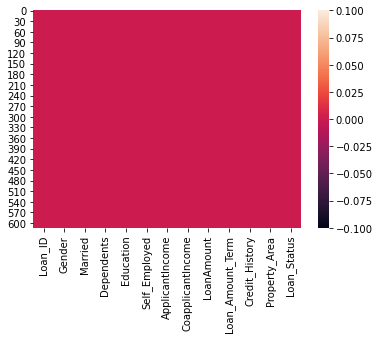

In [11]:
sns.heatmap(df.isnull())

 - Now, there are no null values present in the dataset.

# Exploratory Data Analysis:
    
# Univariate analysis:
    
The data is represented by -

Countplot - which gives the counts of the data presented in the column.

Distplot - gives the distribution of the data

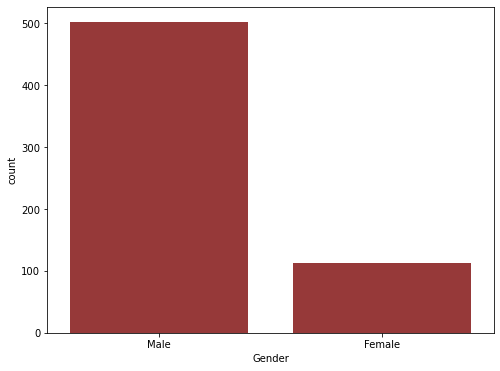

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(x="Gender", data=df, color="brown")
plt.show()

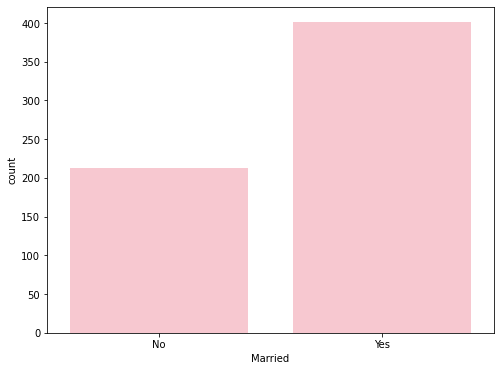

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(x="Married", data=df, color="pink")
plt.show()

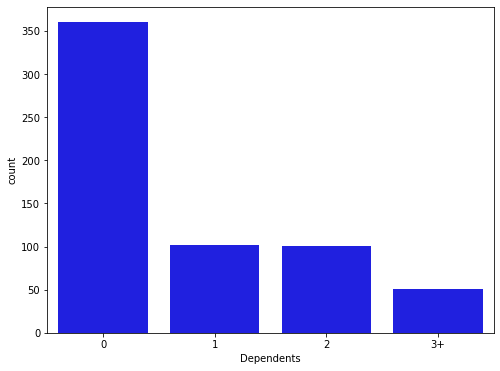

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(x="Dependents", data=df, color="blue")
plt.show()

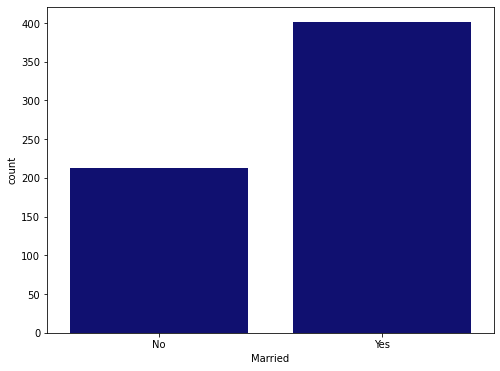

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(x="Married", data=df, color="navy")
plt.show()

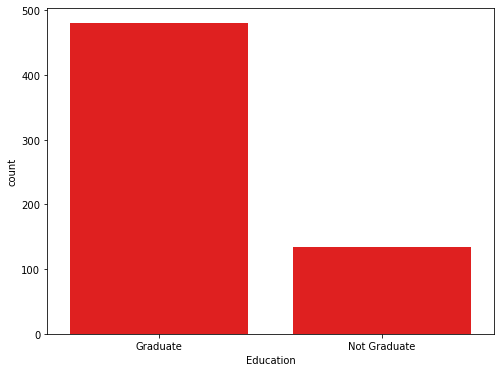

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(x="Education", data=df, color="red")
plt.show()

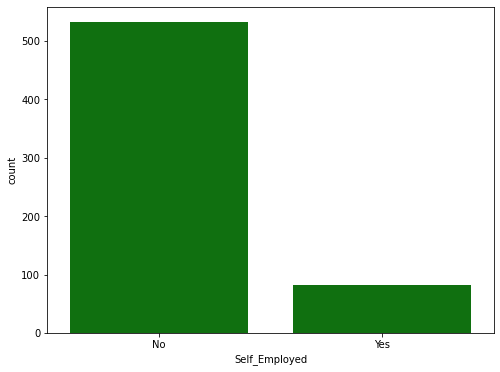

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(x="Self_Employed", data=df, color="green")
plt.show()

<Figure size 864x720 with 0 Axes>

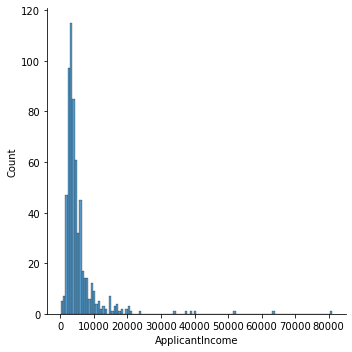

In [21]:
plt.figure(figsize=(12,10))
sns.displot(df['ApplicantIncome'])
plt.show()

<Figure size 864x720 with 0 Axes>

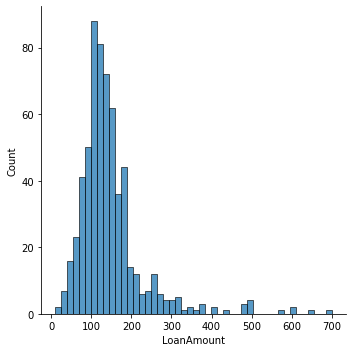

In [22]:
plt.figure(figsize=(12,10))
sns.displot(df['LoanAmount'])
plt.show()

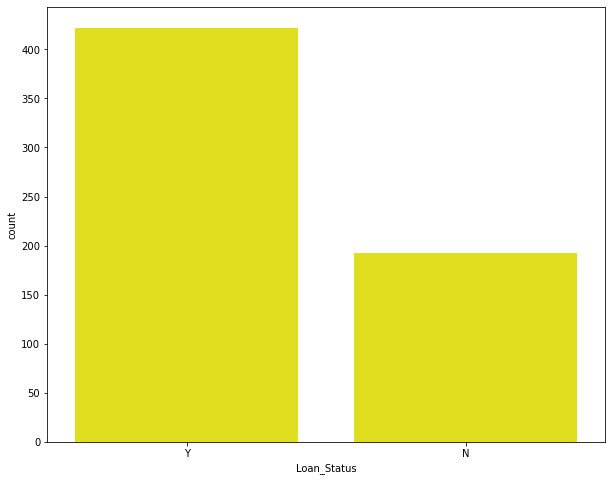

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(x="Loan_Status", data=df, color="yellow")
plt.show()

<Figure size 864x720 with 0 Axes>

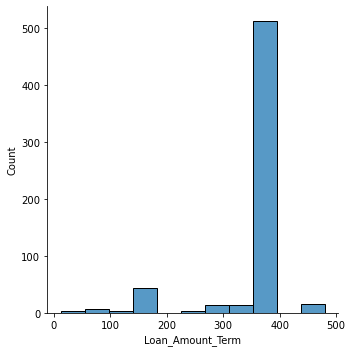

In [24]:
plt.figure(figsize=(12,10))
sns.displot(df['Loan_Amount_Term'])
plt.show()

<Figure size 864x720 with 0 Axes>

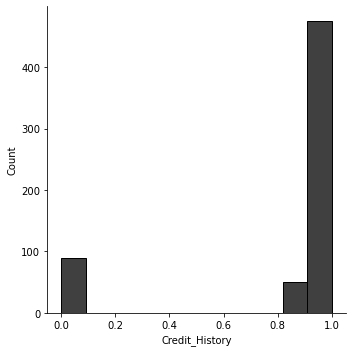

In [25]:
plt.figure(figsize=(12,10))
sns.displot(df['Credit_History'], color='black')
plt.show()

<Figure size 864x720 with 0 Axes>

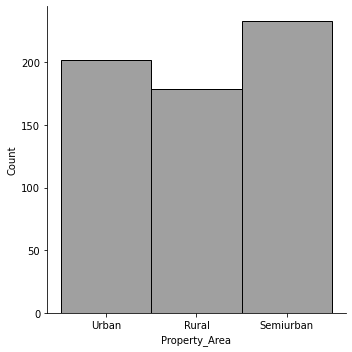

In [27]:
plt.figure(figsize=(12,10))
sns.displot(df['Property_Area'], color="grey")
plt.show()

# Bivariate analysis:

In [28]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

<AxesSubplot:xlabel='Gender', ylabel='count'>

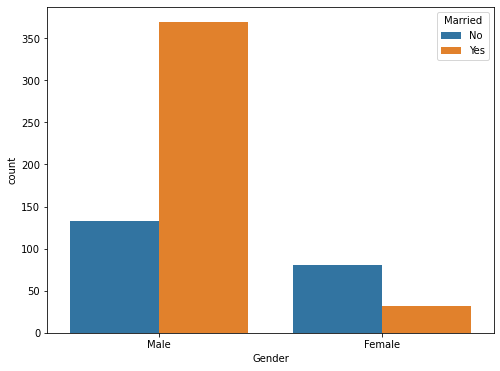

In [29]:
plt.subplots(figsize=(8,6))
sns.countplot(x='Gender',hue='Married',data=df)

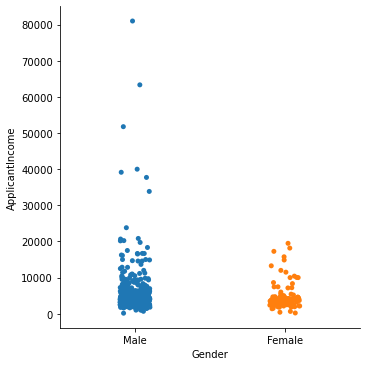

In [30]:
sns.catplot(x ="Gender", y ="ApplicantIncome", data = df)
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

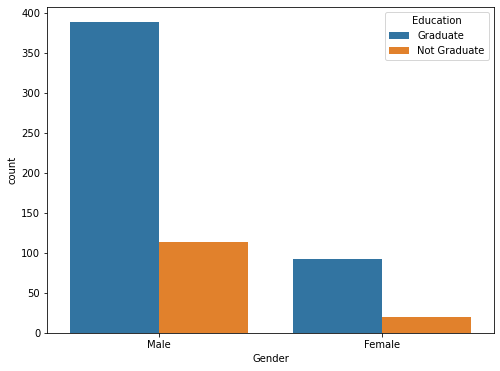

In [31]:
plt.subplots(figsize=(8,6))
sns.countplot(x='Gender',hue='Education',data=df)

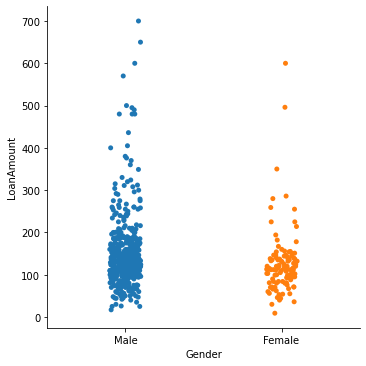

In [32]:
sns.catplot(x ="Gender", y ="LoanAmount", data = df)
plt.show()

<AxesSubplot:xlabel='Education', ylabel='count'>

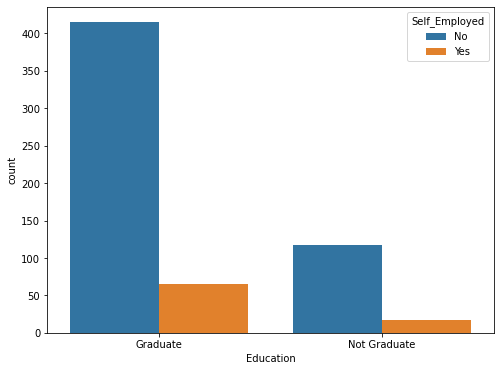

In [33]:
plt.subplots(figsize=(8,6))
sns.countplot(x='Education',hue='Self_Employed',data=df)

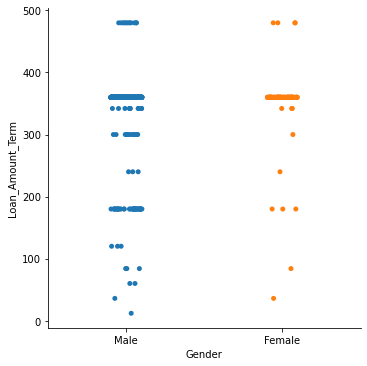

In [34]:
sns.catplot(x ="Gender", y ="Loan_Amount_Term", data = df)
plt.show()

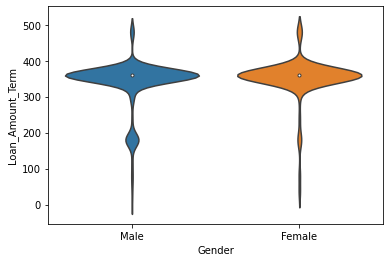

In [36]:
sns.violinplot(x ="Gender", y ="Loan_Amount_Term", data = df)
plt.show()

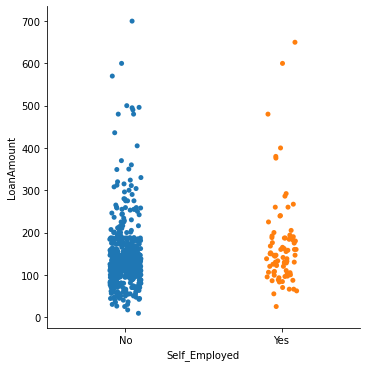

In [37]:
sns.catplot(x ="Self_Employed", y ="LoanAmount", data = df)
plt.show()

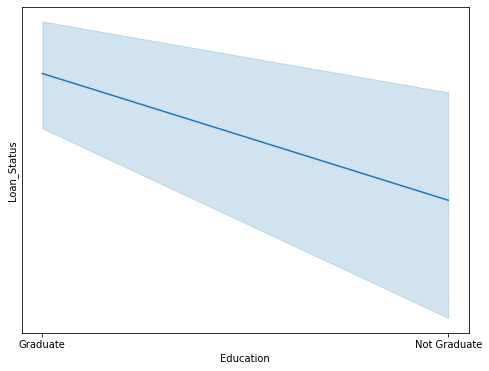

In [38]:
plt.figure(figsize=(8,6))
sns.lineplot(x ="Education", y ="Loan_Status", data = df)
plt.show()

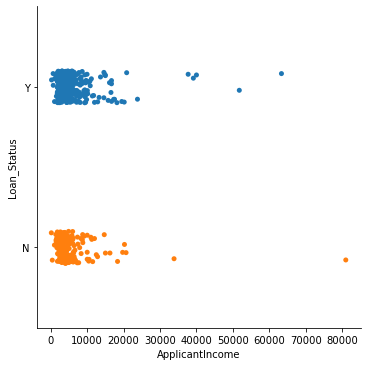

In [39]:
sns.catplot(x ="ApplicantIncome", y ="Loan_Status", data = df)
plt.show()

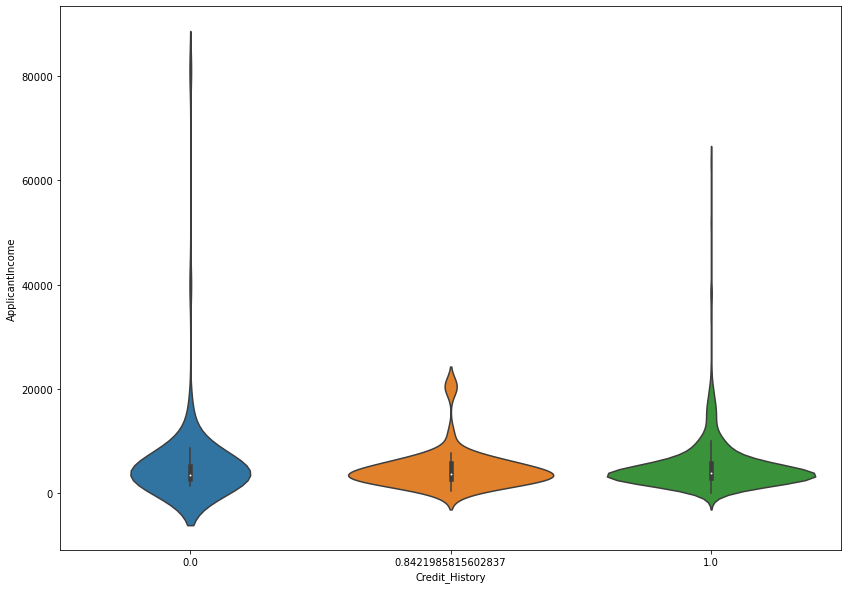

In [40]:
plt.subplots(figsize=(14,10))
sns.violinplot(x ="Credit_History", y ="ApplicantIncome", data = df)
plt.show()

# Multivariate analysis:

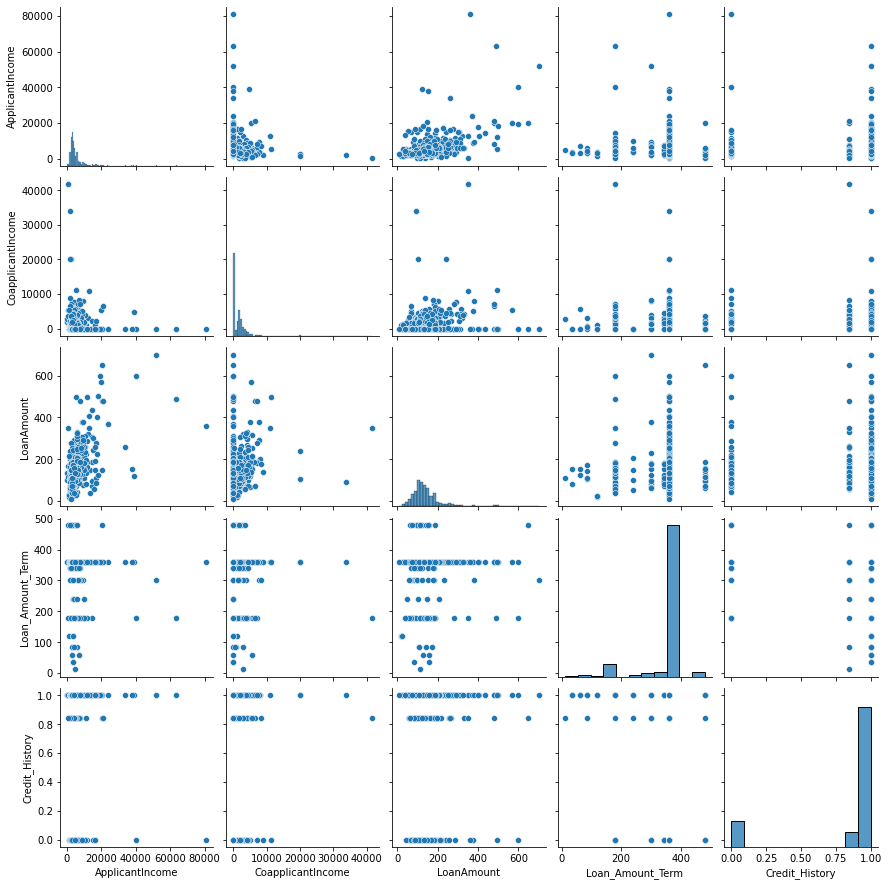

In [41]:
sns.pairplot(df)

# Feature Engineering:

In [42]:
#We are dropping ApplicantIncome and CoapplicantIncome columns as they don't contribute much

df.drop(columns=["ApplicantIncome"],inplace=True)
df.drop(columns=["CoapplicantIncome"],inplace=True)

# Encoding:

We are using Label Encoder to convert all the categorical values into numeric

In [43]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
list1=['Gender','Loan_ID','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for i in list1:
    df[i]=le.fit_transform(df[i].astype(str))

In [44]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,141.000000,360.0,1.0,2,1


In [45]:
df.dtypes

Loan_ID               int32
Gender                int32
Married               int32
Dependents            int32
Education             int32
Self_Employed         int32
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area         int32
Loan_Status           int32
dtype: object

# Summary Statistics:

In [46]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,146.412162,342.000000,0.842199,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,700.000000,480.000000,1.000000,2.000000,1.000000


# Correlation:

In [47]:
df.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.035684,-0.028945,-0.032429,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
LoanAmount,0.035684,0.107930,0.147141,0.163106,-0.166998,0.115260,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.028945,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,-0.032429,0.012819,0.005852,-0.037392,-0.077936,-0.002260,-0.007738,0.001395,1.000000,-0.001880,0.540483
Property_Area,-0.155416,-0.025752,0.004257,-0.000244,-0.065243,-0.030860,-0.044776,-0.077620,-0.001880,1.000000,0.032112


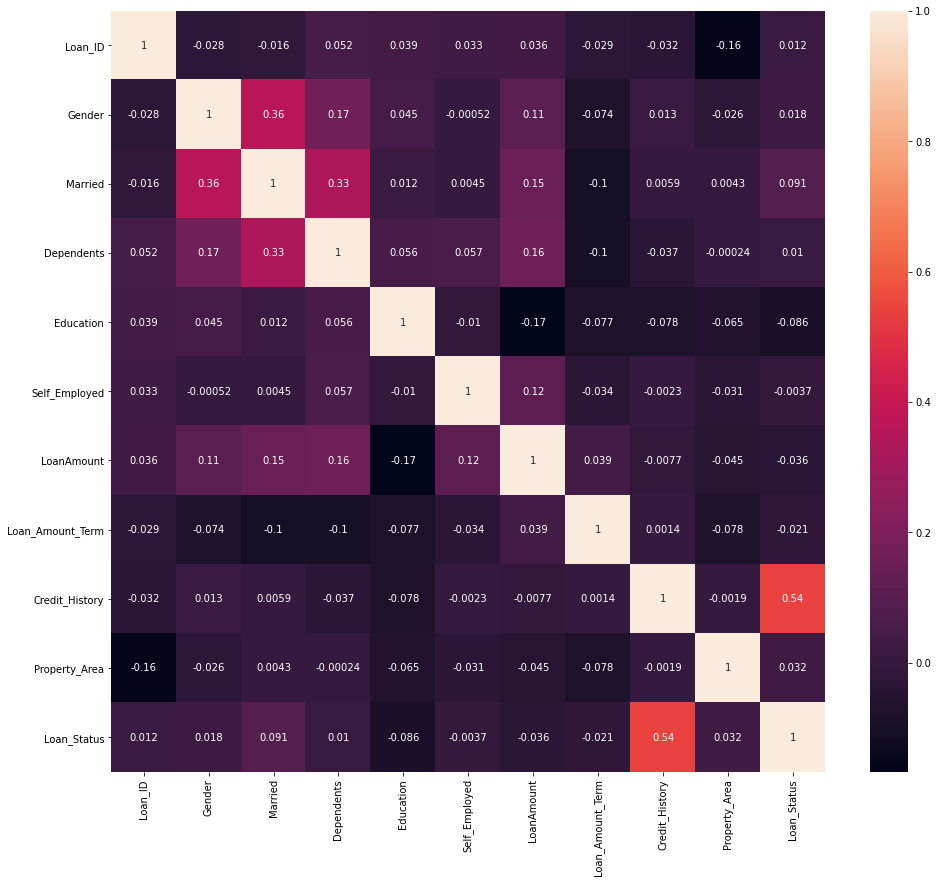

In [48]:
corr_hmap=df.corr()
plt.figure(figsize=(16,14))
sns.heatmap(corr_hmap,annot=True)
plt.show()

# Removing Outliers:

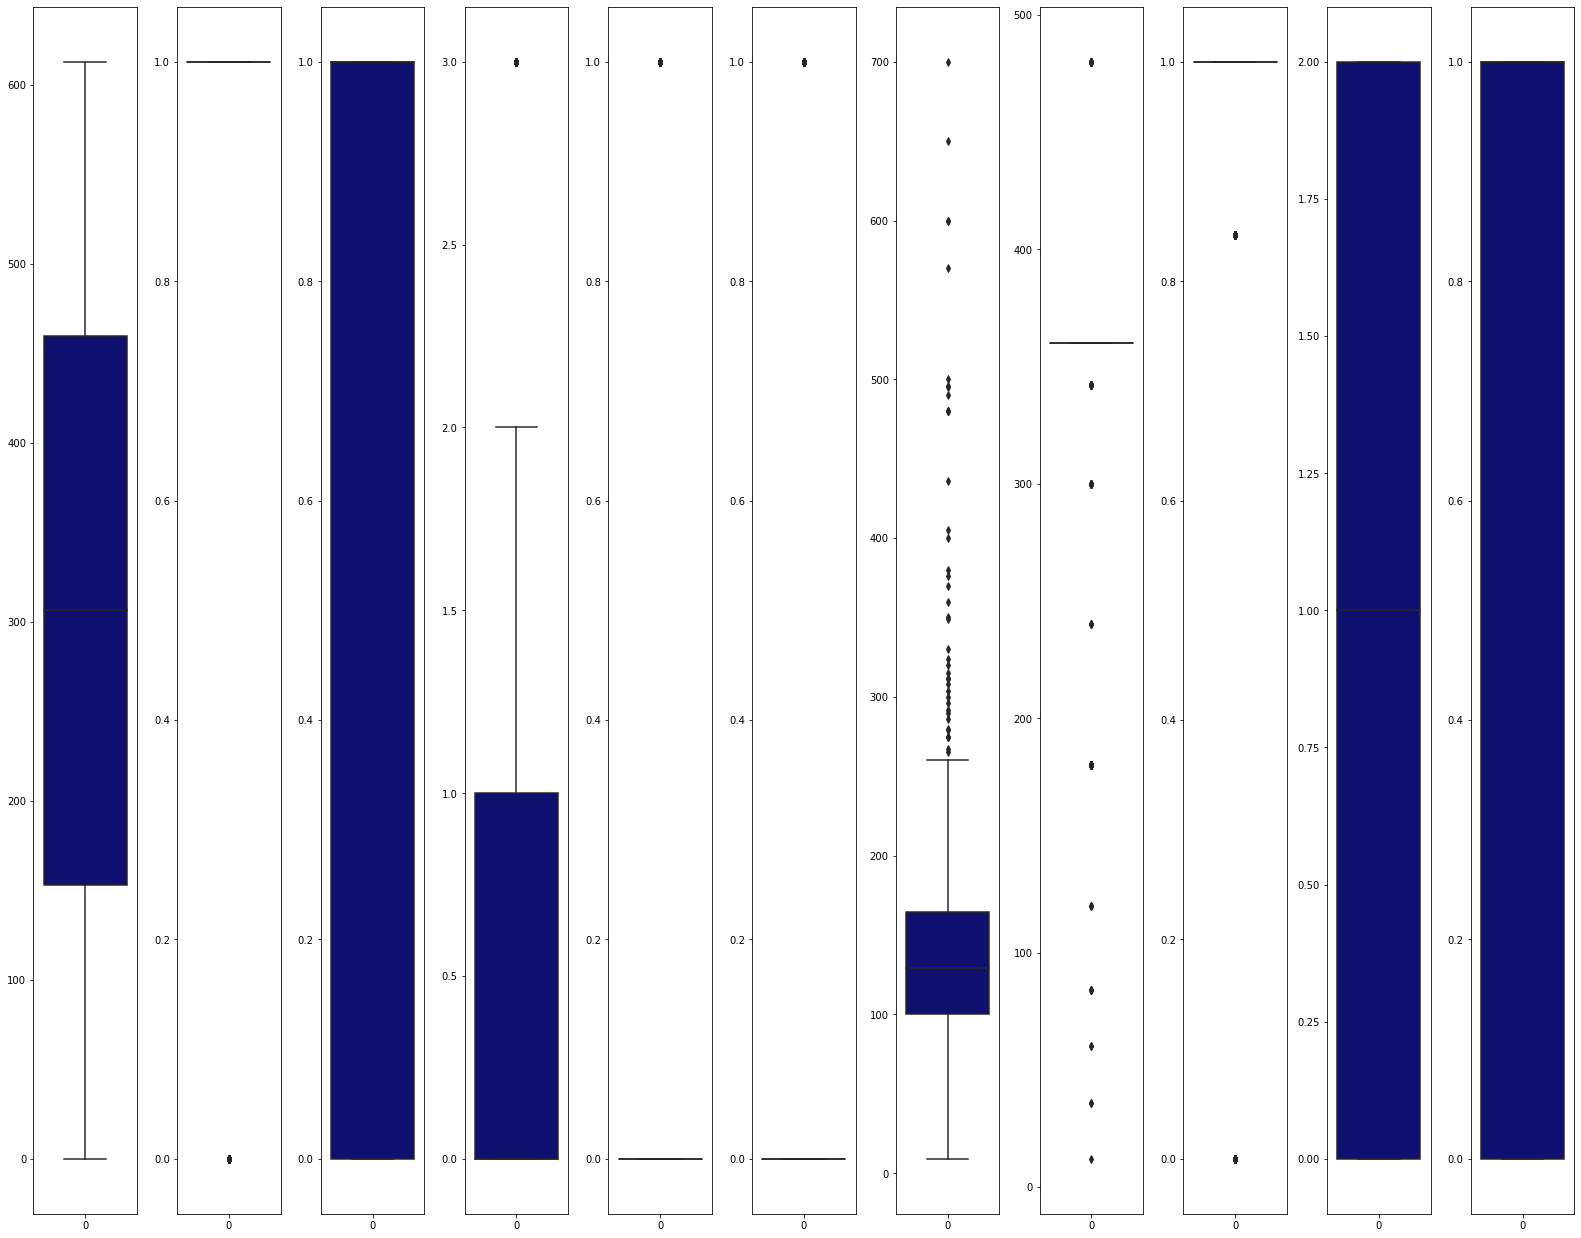

In [49]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(2*ncol,8*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='navy',orient='v')
    plt.tight_layout()

# Using zscore

The outliers are removed from the dataframe. Created new dataframe with no null values present in it.

In [50]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [51]:
new_df=df[(z<3).all(axis=1)]

In [52]:
new_df.shape

(587, 11)

In [53]:
df.shape

(614, 11)

# %Data Loss

In [54]:
Data_loss = ((614-587)/614)*100
Data_loss

4.397394136807818

The loss of data after removing the ouliers is 4.39%.

4.39% data loss is under acceptable range.

# Skewness:

In [55]:
new_df.skew()

Loan_ID             0.007276
Gender             -1.635333
Married            -0.626259
Dependents          1.037749
Education           1.333145
Self_Employed       2.235774
LoanAmount          1.239183
Loan_Amount_Term   -2.088428
Credit_History     -1.930459
Property_Area      -0.057282
Loan_Status        -0.797761
dtype: float64

 - Plotting the distribution plot for new dataframe to see the distribution as well as skewness present in the dataset.

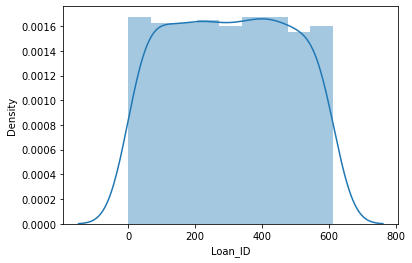

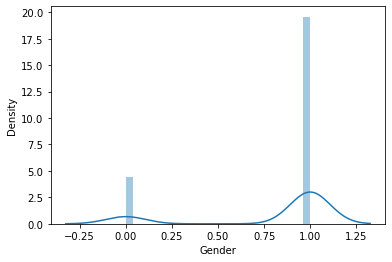

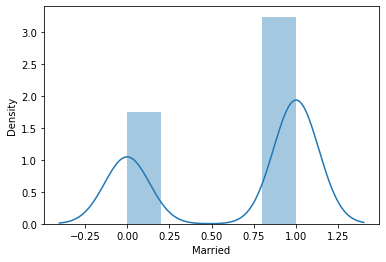

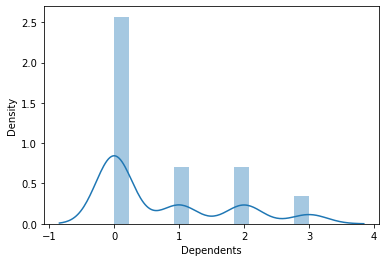

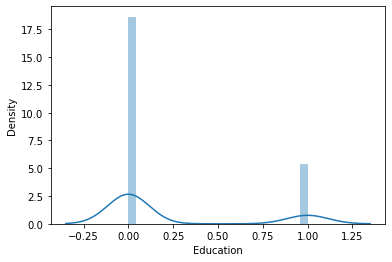

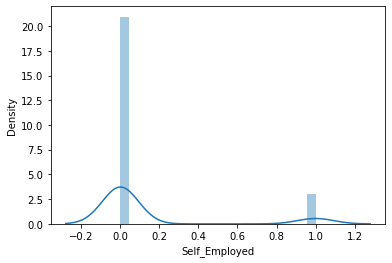

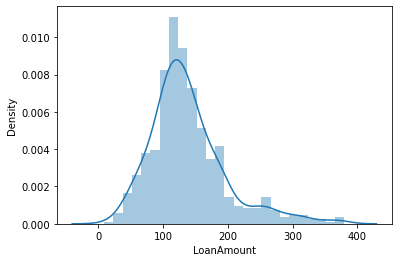

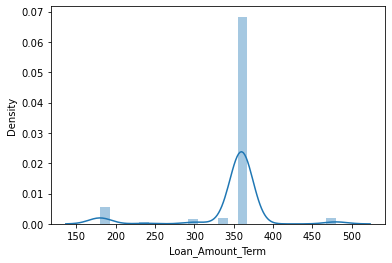

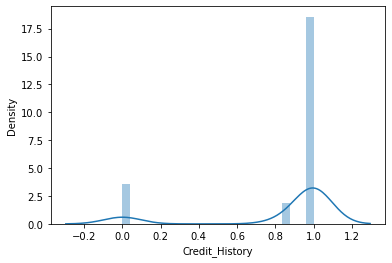

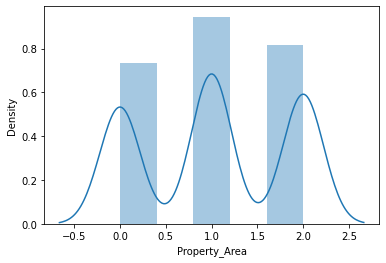

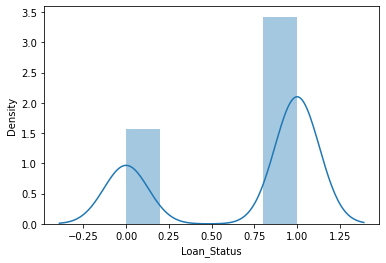

In [56]:
for i in new_df:
    sns.distplot(new_df[i])
    plt.show()

# Removing Skewness:

In [57]:
from scipy.stats import boxcox

for i in new_df.columns:
    if new_df.skew().loc[i]<-0.55:
        new_df[i]=np.square(new_df[i])

In [58]:
new_df.skew()

Loan_ID             0.007276
Gender             -1.635333
Married            -0.626259
Dependents          1.037749
Education           1.333145
Self_Employed       2.235774
LoanAmount          1.239183
Loan_Amount_Term   -0.933761
Credit_History     -1.817925
Property_Area      -0.057282
Loan_Status        -0.797761
dtype: float64

# Spliting the data into Feature and Target:

In [59]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [60]:
x.shape

(614, 10)

In [61]:
y.shape

(614,)

In [62]:
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,0,0,0,146.412162,360.0,1.0,2
1,1,1,1,1,0,0,128.000000,360.0,1.0,0
2,2,1,1,0,0,1,66.000000,360.0,1.0,2
3,3,1,1,0,1,0,120.000000,360.0,1.0,2
4,4,1,0,0,0,0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,71.000000,360.0,1.0,0
610,610,1,1,3,0,0,40.000000,180.0,1.0,0
611,611,1,1,1,0,0,253.000000,360.0,1.0,2
612,612,1,1,2,0,0,187.000000,360.0,1.0,2


In [63]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

# Scalling:

In [64]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x=scaler.fit_transform(x)

In [65]:
x.shape

(614, 10)

In [66]:
y.shape

(614,)

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, classification_report, roc_auc_score, roc_curve,auc

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
lc=LogisticRegression()

maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lc.fit(x_train,y_train)
    pred=lc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is",maxAccu," on Random_state",maxRS)

Best Accuracy is 0.8861788617886179  on Random_state 8


# Train Test Split the data:
    
We got the Best Accuracy is 0.8861788617886179 on Random_state 8. Hence, using these values we are going to train our data using following models :-

 - Logostic Regression

 - Decision Tree Classifier

 - Random Forest Classifier

 - GaussianNB

 - KNeighbors Classifier

 - Gradient Boosting Classifier

 - SVC

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=8)

In [72]:
x_train.shape

(460, 10)

In [73]:
x_test.shape

(154, 10)

In [74]:
y_train.shape

(460,)

In [75]:
y_test.shape

(154,)

# Logistic Regression

In [76]:
lc=LogisticRegression()
lc.fit(x_train,y_train)
pred=lc.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

# Getting the accuarcy score

print(f"Accuracy Score: {acc*100}%")

Accuracy Score: 85.71428571428571%


In [77]:
# Getting the confusion matrix

print(f"Confusion Matrix : \n {cnm}\n")

Confusion Matrix : 
 [[ 23  21]
 [  1 109]]



In [78]:
# Getting the classification report

print(f"Classification Report : \n {cr}")

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.52      0.68        44
           1       0.84      0.99      0.91       110

    accuracy                           0.86       154
   macro avg       0.90      0.76      0.79       154
weighted avg       0.87      0.86      0.84       154



# Decision Tree Classifier

In [79]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

In [80]:
# Getting the accuarcy score

print(f"Accuracy Score: {acc*100}%")

Accuracy Score: 74.02597402597402%


In [81]:
# Getting the confusion matrix

print(f"Confusion Matrix : \n {cnm}\n")

Confusion Matrix : 
 [[27 17]
 [23 87]]



In [82]:
print(f"Classification Report : \n {cr}")

Classification Report : 
               precision    recall  f1-score   support

           0       0.54      0.61      0.57        44
           1       0.84      0.79      0.81       110

    accuracy                           0.74       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.75      0.74      0.74       154



# Random Forest Classifier

In [83]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

In [84]:
# Getting the accuarcy score

print(f"Accuracy Score: {acc*100}%")

Accuracy Score: 83.76623376623377%


In [85]:
# Getting the confusion matrix

print(f"Confusion Matrix : \n {cnm}\n")

Confusion Matrix : 
 [[ 28  16]
 [  9 101]]



In [86]:
# Getting the classification report

print(f"Classification Report : \n {cr}")

Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.64      0.69        44
           1       0.86      0.92      0.89       110

    accuracy                           0.84       154
   macro avg       0.81      0.78      0.79       154
weighted avg       0.83      0.84      0.83       154



# GaussianNB

In [87]:
gb=GaussianNB()
gb.fit(x_train,y_train)
pred=gb.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

In [88]:
# Getting the accuarcy score

print(f"Accuracy Score: {acc*100}%")

Accuracy Score: 85.71428571428571%


In [89]:
# Getting the confusion matrix

print(f"Confusion Matrix : \n {cnm}\n")

Confusion Matrix : 
 [[ 23  21]
 [  1 109]]



In [90]:
# Getting the classification report

print(f"Classification Report : \n {cr}")

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.52      0.68        44
           1       0.84      0.99      0.91       110

    accuracy                           0.86       154
   macro avg       0.90      0.76      0.79       154
weighted avg       0.87      0.86      0.84       154



# KNeighbors Classifier

In [91]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

In [92]:
# Getting the accuarcy score

print(f"Accuracy Score: {acc*100}%")

Accuracy Score: 81.16883116883116%


In [93]:
# Getting the confusion matrix

print(f"Confusion Matrix : \n {cnm}\n")

Confusion Matrix : 
 [[ 22  22]
 [  7 103]]



In [94]:
# Getting the classification report

print(f"Classification Report : \n {cr}")

Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.50      0.60        44
           1       0.82      0.94      0.88       110

    accuracy                           0.81       154
   macro avg       0.79      0.72      0.74       154
weighted avg       0.81      0.81      0.80       154



# Gradient Boosting Classifier

In [95]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

In [96]:
# Getting the accuarcy score

print(f"Accuracy Score: {acc*100}%")

Accuracy Score: 85.06493506493507%


In [97]:
# Getting the confusion matrix

print(f"Confusion Matrix : \n {cnm}\n")

Confusion Matrix : 
 [[ 30  14]
 [  9 101]]



In [98]:
# Getting the classification report

print(f"Classification Report : \n {cr}")

Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.68      0.72        44
           1       0.88      0.92      0.90       110

    accuracy                           0.85       154
   macro avg       0.82      0.80      0.81       154
weighted avg       0.85      0.85      0.85       154



# SVC

In [99]:
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

In [100]:
# Getting the accuarcy score

print(f"Accuracy Score: {acc*100}%")

Accuracy Score: 85.06493506493507%


In [101]:
# Getting the confusion matrix

print(f"Confusion Matrix : \n {cnm}\n")

Confusion Matrix : 
 [[ 23  21]
 [  2 108]]



In [102]:
# Getting the classification report

print(f"Classification Report : \n {cr}")

Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.52      0.67        44
           1       0.84      0.98      0.90       110

    accuracy                           0.85       154
   macro avg       0.88      0.75      0.79       154
weighted avg       0.86      0.85      0.84       154



# Cross Validation:

In [103]:
cv=cross_val_score(lc,x,y,cv=5).mean()

print("Cross Validation Score for Logistic Regression is : ",cv)

Cross Validation Score for Logistic Regression is :  0.8062108489937359


In [104]:
cvdt=cross_val_score(dt,x,y,cv=5).mean()

print("Cross Validation Score for Decision Tree Classifier is : ",cvdt)

Cross Validation Score for Decision Tree Classifier is :  0.7133013461282154


In [105]:
cvrf=cross_val_score(rf,x,y,cv=5).mean()

print("Cross Validation Score for Random Forest Classifier is : ",cvrf)

Cross Validation Score for Random Forest Classifier is :  0.7686125549780088


In [106]:
cvgb=cross_val_score(gb,x,y,cv=5).mean()

print("Cross Validation Score for GaussianNB is : ",cvgb)

Cross Validation Score for GaussianNB is :  0.7980407836865254


In [107]:
cvknn=cross_val_score(knn,x,y,cv=5).mean()

print("Cross Validation Score for KNeighborsClassifier is : ",cvknn)

Cross Validation Score for KNeighborsClassifier is :  0.7736238837798214


In [108]:
cvgbc=cross_val_score(gbc,x,y,cv=5).mean()

print("Cross Validation Score for Gradient Boosting Classifier is : ",cvgbc)

Cross Validation Score for Gradient Boosting Classifier is :  0.6889111022257763


In [109]:
cvsvc=cross_val_score(svc,x,y,cv=5).mean()

print("Cross Validation Score for SVC is : ",cvsvc)

Cross Validation Score for SVC is :  0.8045715047314408


# Overfitting & Underfitting:

In [110]:
import matplotlib.pyplot as plt

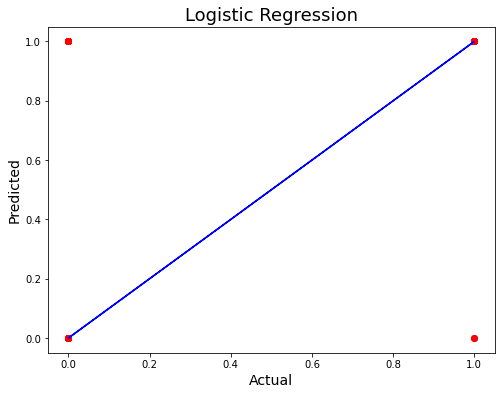

In [111]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Logistic Regression',fontsize=18)
plt.show()

# Hyper Parameter Tuning:
    
It is observed that Decision Tree Classifier as our best model as it has least difference between it's Accuracy score and CV score.

In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
parameter={'criterion':['gini', 'entropy'] ,
           'max_depth':np.arange(2,20), 
           'max_leaf_nodes':[1,2,3,4,5,6],
           'splitter':['best','random']}

In [114]:
GCV=GridSearchCV(dt,parameter,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6],
                         'splitter': ['best', 'random']})

In [115]:
#Getting the best parameters using GridSearchCV

GCV.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_leaf_nodes': 5,
 'splitter': 'random'}

In [116]:
loan_final=DecisionTreeClassifier(criterion='gini', max_depth=17, max_leaf_nodes=5, splitter='random')
loan_final.fit(x_train,y_train)
pred=loan_final.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

85.71428571428571


# We are getting the model accuracy and cross validation score both as 85.71% which shows our model is performing well.

# AUC - ROC Curve:
    
 - AUC Curve - A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.
 

 - ROC Curves - It summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.

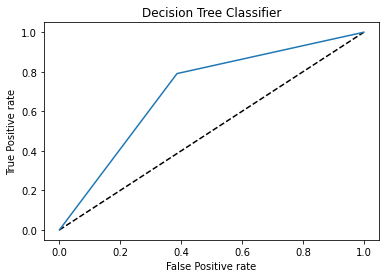

0.7022727272727274


In [117]:
y_pred_proba= dt.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='dtr')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Decision Tree Classifier')
plt.show()

# Getting the AUC score
auc_score=roc_auc_score(y_test,dt.predict(x_test))
print(auc_score)

# Saving the Model

In [118]:
import joblib
joblib.dump(loan_final,"Loan_application_status_prediction(submission).pkl")

['Loan_application_status_prediction(submission).pkl']

In [119]:
loan_model = joblib.load(open('Loan_application_status_prediction(submission).pkl','rb'))
result = loan_model.score(x_test,y_test)
print(result)

0.8571428571428571


In [120]:
Conclusion = pd.DataFrame([loan_model.predict(x_test)[:],dt.predict(x_test)[:]],index=["Predicted","Original"])

In [121]:
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,151,152,153
Predicted,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Original,0,1,1,1,1,1,0,0,1,1,...,1,0,1,1,1,1,1,1,0,1
